<a href="https://colab.research.google.com/github/rasyidabdi/MachineLearningTask/blob/main/Week11/Rasyid%20Abdi_1103204127%20LeNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nama : Rasyid abdi gantoro

Nim : 1103204127



**Import Library**

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

**Import dan Muat Data Set**

In [2]:
# Load dataset
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

# Normalize the images to the range of 0 to 1
train_images, test_images = train_images / 255.0, test_images / 255.0

# Expand dimensions to match the input shape of the model (28, 28, 1)
train_images = train_images[..., tf.newaxis]
test_images = test_images[..., tf.newaxis]


11490434/11490434 [==============================] - 0s 0us/step


**Definiisikan mode LeNet**

In [3]:
def create_lenet_model():
    model = models.Sequential()
    model.add(layers.Conv2D(6, (5, 5), activation='relu', input_shape=(28, 28, 1)))
    model.add(layers.AveragePooling2D())
    model.add(layers.Conv2D(16, (5, 5), activation='relu'))
    model.add(layers.AveragePooling2D())
    model.add(layers.Flatten())
    model.add(layers.Dense(120, activation='relu'))
    model.add(layers.Dense(84, activation='relu'))
    model.add(layers.Dense(10, activation='softmax'))
    return model

**Buat Model Kompilasi dan Latih**

In [4]:

# Create the LeNet model
model = create_lenet_model()

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))

Epoch 1/10
1875/1875 [==============================] - 34s 17ms/step - loss: 0.2282 - accuracy: 0.9317 - val_loss: 0.1065 - val_accuracy: 0.9645
Epoch 2/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0787 - accuracy: 0.9756 - val_loss: 0.0533 - val_accuracy: 0.9819
Epoch 3/10
1875/1875 [==============================] - 29s 15ms/step - loss: 0.0564 - accuracy: 0.9826 - val_loss: 0.0515 - val_accuracy: 0.9844
Epoch 4/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0437 - accuracy: 0.9865 - val_loss: 0.0464 - val_accuracy: 0.9864
Epoch 5/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0364 - accuracy: 0.9883 - val_loss: 0.0445 - val_accuracy: 0.9862
Epoch 6/10
1875/1875 [==============================] - 29s 16ms/step - loss: 0.0292 - accuracy: 0.9908 - val_loss: 0.0501 - val_accuracy: 0.9844
Epoch 7/10
1875/1875 [==============================] - 31s 16ms/step - loss: 0.0256 - accuracy: 0.9919 - val_loss: 0.0400 -

**Visualisasi Model**

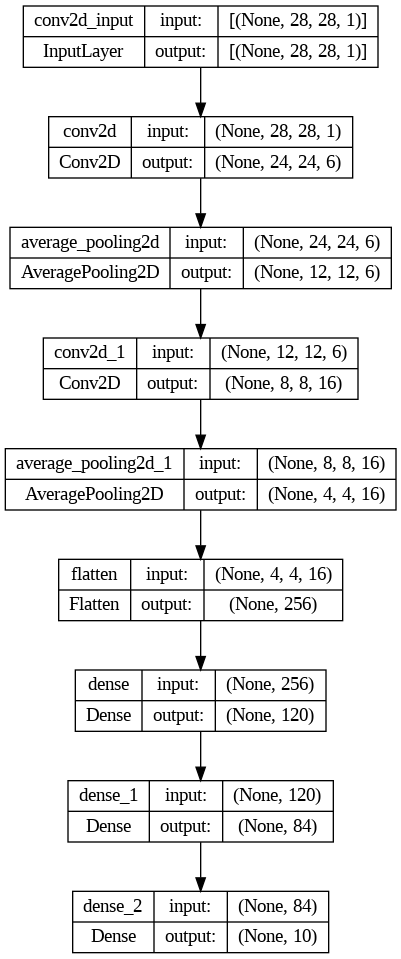

In [5]:
# Visualize the model architecture
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='lenet_model.png', show_shapes=True, show_layer_names=True)


**Visualisasi Hasil Pelatihan**

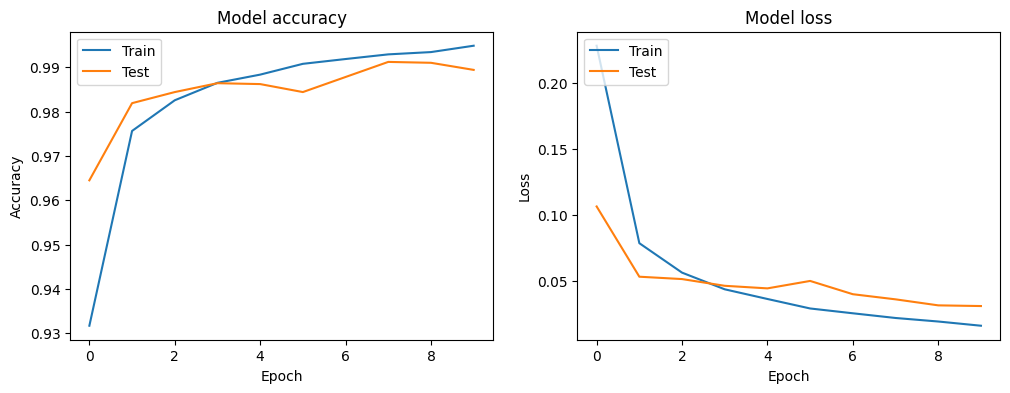

In [6]:
# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.show()
